<a href="https://colab.research.google.com/github/KPAryan/CodeSoft/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saviouraryankumar","key":"248cdd1054c23496a1e9d86895bdb7c8"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip -q creditcardfraud.zip

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0


In [ ]:
!pip install -q imbalanced-learn

# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [ ]:
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_curve, roc_auc_score, auc
)
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv('creditcard.csv')
df['Amount'] = StandardScaler().fit_transform(df[['Amount']])
df.drop('Time', axis=1, inplace=True)

# Features and label
X = df.drop('Class', axis=1)
y = df['Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [ ]:
# Train models
lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

lr.fit(X_train_res, y_train_res)
rf.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

In [ ]:
lr_preds = lr.predict(X_test)
rf_preds = rf.predict(X_test)

lr_probs = lr.predict_proba(X_test)[:, 1]
rf_probs = rf.predict_proba(X_test)[:, 1]

In [ ]:
def evaluate(name, y_true, y_pred):
    print(f"\n=== {name} ===")
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred))

evaluate("Logistic Regression", y_test, lr_preds)
evaluate("Random Forest", y_test, rf_preds)


=== Logistic Regression ===
[[55355  1509]
 [    8    90]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.98     56962


=== Random Forest ===
[[56852    12]
 [   17    81]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.83      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962



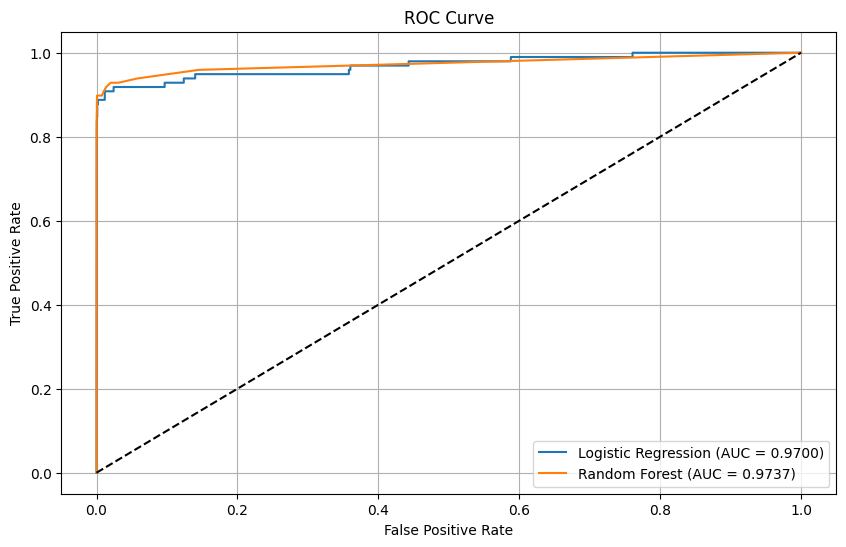

In [ ]:
# ROC and AUC
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

lr_auc = auc(lr_fpr, lr_tpr)
rf_auc = auc(rf_fpr, rf_tpr)

plt.figure(figsize=(10,6))
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.4f})')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

In [ ]:
new_data = np.random.normal(0, 1, (1, 29))  # Generate dummy data similar to PCA-normalized

# Predict using both models
lr_prediction = lr.predict(new_data)
rf_prediction = rf.predict(new_data)

# Show results
print("Logistic Regression Prediction:", "Fraud" if lr_prediction[0] == 1 else "Genuine")
print("Random Forest Prediction:", "Fraud" if rf_prediction[0] == 1 else "Genuine")

Logistic Regression Prediction: Fraud
Random Forest Prediction: Genuine


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
